# Question 2

In [4]:
%matplotlib nbagg
import ipympl
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import control
import math
plt.style.use("ggplot")

In [5]:
comp = control.TransferFunction([1, 0.1],[1, 0.0185])
print(comp)


  s + 0.1
----------
s + 0.0185



In [6]:
def get_params(Mp,ts):
    '''
    Mp in percent
    '''

    x = np.log(Mp/100)**2
    zeta = x / (x + np.pi**2)
    zeta = np.sqrt(zeta)

    wn = 4/ts/zeta 

    return zeta, wn

def polar(z):
    '''
    Get polar representation
    '''
    a= z.real
    b= z.imag
    r = math.hypot(a,b)
    theta = math.atan2(b,a)
    return r,theta # use return instead of print.

def get_poles(zeta,wn):
    '''
    Get poles f4om
    '''
    return (complex(-zeta*wn, wn*np.sqrt(1-zeta**2)), complex(-zeta*wn ,- wn*np.sqrt(1-zeta**2)))

def get_alpha(gamma, theta, phi):
    '''
    Returns alpha from gamma.
    
    All angles in radians
    '''
    num = np.sin(gamma) * np.sin(theta + gamma + phi)
    denom = np.sin(theta + gamma) * np.sin(gamma + phi)
    return num/denom

def get_zc(wn, gamma, theta):
    '''
    Get zc
    '''
    num = wn* np.sin(gamma)
    denom = np.sin(theta + gamma)
    return num/denom

In [7]:
polar(comp.evalfr(complex(-1.578, 2.205)))[1] * 180/np.pi

1.0387956225844697

<IPython.core.display.Javascript object>


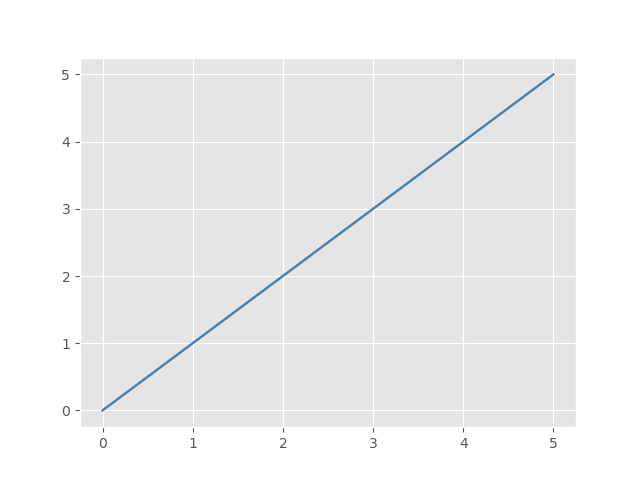

In [8]:
plt.plot(np.arange(6))

<IPython.core.display.Javascript object>


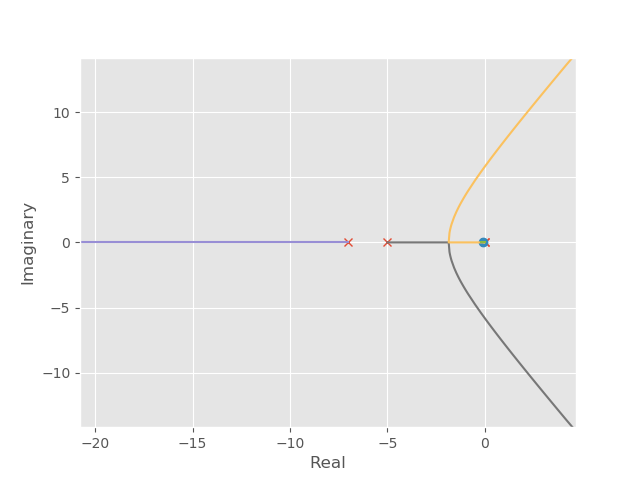

In [12]:
sys = control.TransferFunction([2],[1,12,35,0])
plt.plot(np.arange(6))
control.root_locus(comp*sys);

In [ ]:
sys = control.TransferFunction(10,[1,0])
sys *= control.TransferFunction(1,[1,1.2])
sys *= control.TransferFunction(1,[1,6])
sys *= control.TransferFunction([1,1.266],[1,3.159])

